In [16]:
import numpy as np
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import fitness_mcmc
import fitness_mcmc.data_io as io
import fitness_mcmc.fitness_mcmc as m

[[ 13439   1710      0      0      0      0]
 [ 12698   1767      0      0      0      0]
 [ 16799   1981      0      0   4610      0]
 [ 12833   1885      0      0      0      0]
 [ 17980   2119      0      0   4938      0]
 [ 16960   2207      0      0   1085      0]
 [ 16440   2182      0      0   1025      0]
 [ 13905   1853      0      0      0      0]
 [ 15732   2247      0      0      0      0]
 [ 16299   2069      0      0      0      0]
 [ 15367   2095      0      0      0      0]
 [ 17082   2066      0      0      0      0]
 [ 14917   2064      0      0   1008      0]
 [ 14290   1970      0      0      0      0]
 [ 15905   1930      0      0      0      0]
 [ 17227   2209      0      0   1094      0]
 [ 13856   2080      0      0      0      0]
 [ 13012   1764      0      0   3472      0]
 [ 15562   2106      0      0      0      0]
 [  3987      0      0      0      0      0]
 [  3558      0      0      0      0      0]
 [  3581   1389   1258   1686   1517      0]
 [  3370  

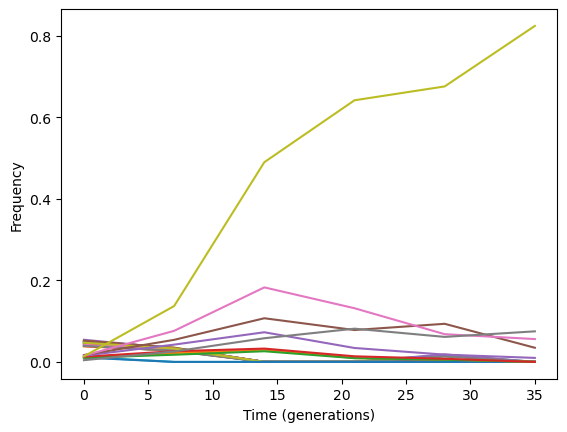

In [17]:
environment = "gluL"
replicate = 2
r = environment + str(replicate)

data, time, ordered_counts = io.load_data("LTEE_" + r + ".csv", return_ordered = False, delimiter=",")
print(ordered_counts.astype("int"))
print(data)

ordered_frequencies = ordered_counts / np.sum(ordered_counts, axis = 0)

plt.plot([0,7,14,21,28,35], ordered_frequencies.T)
plt.xlabel('Time (generations)')
plt.ylabel('Frequency')
plt.show()

In [18]:
fitness_model = m.Fitness_Model(ordered_counts, time, s_ref = 1, prior="flat")
fitness_model.find_MAP()

C:\Users\jedwa\anaconda3\envs\Fitness_code\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


In [19]:
raw_s = fitness_model.map_estimate["s"]
vals_f0 = fitness_model.map_estimate["f0"]
vals_s = np.zeros((29))
vals_s[0] = 0
for i in range(0, len(raw_s)):
    vals_s[i + 1] = raw_s[i]
vals_data = fitness_model.data
print(raw_s)
print(vals_f0)
fitness_model.plot_MAP_estimate(type = "lin", filename="LTEE_" + r + "_freq.png")

[[ 1.00798098]
 [ 1.16964209]
 [ 1.01280557]
 [ 1.16968248]
 [ 1.0950027 ]
 [ 1.09413581]
 [ 1.00421262]
 [ 1.01037917]
 [ 0.9997854 ]
 [ 1.00621507]
 [ 0.99532558]
 [ 1.09874702]
 [ 1.00723838]
 [ 0.99553999]
 [ 1.09439168]
 [ 1.01467563]
 [ 1.16833348]
 [ 1.00555623]
 [-0.00434231]
 [-0.0041491 ]
 [ 1.21732407]
 [ 1.21900344]
 [ 1.22290108]
 [ 1.25774479]
 [ 1.30452188]
 [ 1.30002061]
 [ 1.34799903]
 [ 1.37365334]]
[0.04162227 0.03946238 0.04230454 0.03998815 0.0452747  0.04883042
 0.04746533 0.04312633 0.0489428  0.05044205 0.04770338 0.05276635
 0.04299792 0.04438573 0.049136   0.0495707  0.04321779 0.0332698
 0.04829253 0.01205341 0.01075359 0.01140451 0.01032031 0.01336445
 0.01635248 0.01646238 0.02154622 0.00496511 0.02397839]


UFuncTypeError: Cannot cast ufunc 'true_divide' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [ ]:
out = open("Fitness_" + r + ".csv", "w")
header = "BC,0,7,14,21,28,35,s,f0"
bc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,500,1000,1500,2000,5000,10000,15000,30000,40000,50000]
out.write(header)
out.write("\n")
for l in range(0, len(vals_s)):
    holder = str(bc[l])
    for h in range(0, 6):
        holder += ',' + str(vals_data[l][h])
    holder += ',' + str(vals_s[l]) + ',' + str(vals_f0[l])
    out.write(holder)
    out.write("\n")
out.close()

In [ ]:
traj = m.create_trajectories(vals_f0, vals_s, time)
err_data = m.sample_lineages(traj, 100000)
print(err_data)

In [ ]:
out = open("C:\\Users\\jedwa\\Documents\\Desai_Lab\\LTEE\\Fitness_code\\fitness_mcmc\\fitness_mcmc\\experimental_data\\Sim_counts_" + r + ".csv", "w")
header = "BC,0,7,14,21,28,35"
bc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,500,1000,1500,2000,5000,10000,15000,30000,40000,50000]
out.write(header)
out.write("\n")
for l in range(0, len(vals_s)):
    holder = str(bc[l])
    for h in range(0, 6):
        holder += ',' + str(err_data[l][h])
    out.write(holder)
    out.write("\n")
out.close()

In [ ]:
data, time, err_counts = io.load_data("Sim_counts_" + r + ".csv", return_ordered = False, delimiter=",")
print(err_counts.astype("int"))
print(data)

err_frequencies = err_counts / np.sum(err_counts, axis = 0)

plt.plot([0,7,14,21,28,35], err_frequencies.T)
plt.xlabel('Time (generations)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
err_model = m.Fitness_Model(err_counts, time, s_ref = 0, prior="flat")
err_model.find_MAP()

In [ ]:
#err_model.plot_MAP_estimate(type = "lin", filename="Error_" + r + "_freq.png")
e_raw_s = err_model.map_estimate["s"]
e_vals_f0 = err_model.map_estimate["f0"]
e_vals_s = np.zeros((29))
e_vals_s[0] = 0
for i in range(0, len(e_raw_s)):
    e_vals_s[i + 1] = e_raw_s[i]
e_vals_data = err_model.data

In [ ]:
out = open("FitnessError_" + r + ".csv", "w")
header = "BC,s,f0,s_err,f0_err"
bc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,500,1000,1500,2000,5000,10000,15000,30000,40000,50000]
out.write(header)
out.write("\n")
for l in range(0, len(e_vals_s)):
    holder = str(bc[l])
    holder += ',' + str(vals_s[l]) + ',' + str(vals_f0[l]) + ',' + str(e_vals_s[l]) + ',' + str(e_vals_f0[l])
    out.write(holder)
    out.write("\n")
out.close()